In [6]:
import numpy as np
from scipy.io import wavfile
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import pandas as pd


In [16]:


X = pd.read_csv('data/mixed_signals.csv', delimiter=',') + np.random.normal(0, 0.1, X.shape)  # Thêm nhiễu

In [18]:
# X["Micro1"]

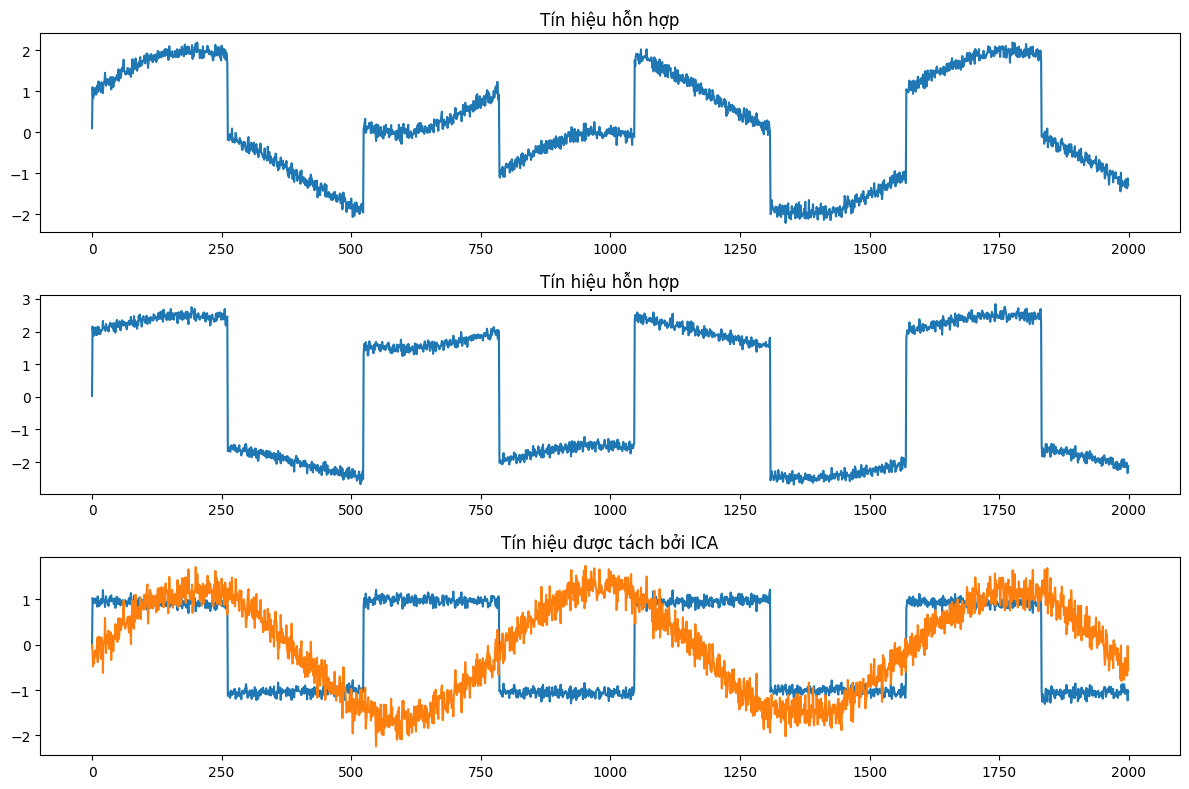

In [ ]:

# X = np.dot(S, A.T)  # Tín hiệu hỗn hợp (2000x2)

# 2. Áp dụng ICA
ica = FastICA(n_components=2, random_state=0)
S_ = ica.fit_transform(X)  # Tín hiệu được tách

# 3. Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Tín hiệu gốc
# plt.subplot(2, 1, 1)
# plt.title('Tín hiệu gốc')
# plt.plot(S)

plt.subplot(3, 1, 1)
plt.title('Tín hiệu hỗn hợp 1')
plt.plot(X["Micro1"], label='Tín hiệu hỗn hợp')


plt.subplot(3, 1, 2)
plt.title('Tín hiệu hỗn hợp 2')
plt.plot(X["Micro2"], label='Tín hiệu hỗn hợp')

plt.subplot(3, 1, 3)
plt.title('Tín hiệu được tách bởi ICA')
plt.plot(S_)

plt.tight_layout()
plt.show()

wavfile.write('source1.wav', 8000, (S_[:, 0] * 10000).astype(np.int16))
wavfile.write('source2.wav', 8000, (S_[:, 1] * 10000).astype(np.int16))